## Simple Linear Regression Model
### Linear regression model for predcition of salaries based on work experience

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load the data set
data = pd.read_csv('Salary_dataset.csv', index_col=False)

In [4]:
data = data.drop('Index', axis=1)
data.head() # dropping the repeated column Index

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [5]:
# Extracting features and targets
feature = data["YearsExperience"]
target = data['Salary']

In [6]:
target.shape

(30,)

Text(0, 0.5, 'Salary')

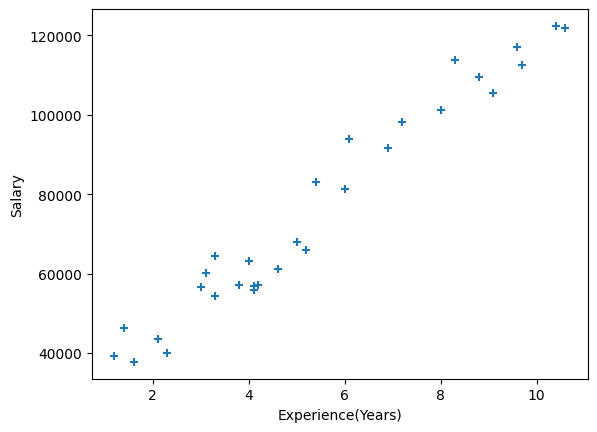

In [7]:
# plotting the data points for visual representation
plt.scatter(feature, target, marker='+')
plt.xlabel('Experience(Years)')
plt.ylabel('Salary')

In [8]:
# splitting data for test and train for model training and prediction/evaluation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, train_size=0.6, random_state=42) # 0,42 anyone is good

In [9]:
y_train.shape, y_test.shape

((18,), (12,))

In [10]:
X_train = np.array(X_train)[:, np.newaxis]
X_test = np.array(X_test)[:, np.newaxis]

## Training Model

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Model: y = mx + c
`m = model's coefficient,
c = model's intercept,
x = features`

In [12]:
print(model.coef_) # m
print(model.intercept_) # c

[9284.87835182]
25879.113578471923


`Model: y = 9284.88 * x(Yearsofexperience) + 25879.11`

In [13]:
predict = model.predict(X_test)

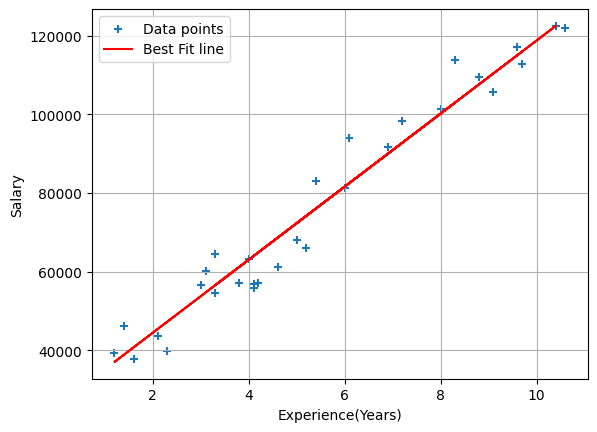

In [14]:
# plotting the best fit line
plt.scatter(feature, target, marker='+', label='Data points')
plt.plot(X_test, predict, linestyle='-', color='red', label='Best Fit line')
plt.xlabel('Experience(Years)')
plt.ylabel('Salary')
plt.legend()
plt.grid()

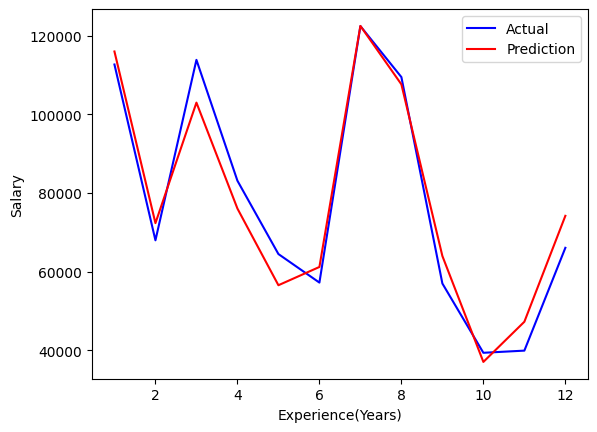

In [16]:
idx = [i for i in range(1, X_test.shape[0] + 1)]

#Prediciton vs Acutal
plt.plot(idx, y_test, linestyle='-', color='blue', label='Actual')
plt.plot(idx, predict, linestyle='-', color='red', label='Prediction')
plt.xlabel('Experience(Years)')
plt.ylabel('Salary')
plt.legend()

In [17]:
from sklearn.metrics import r2_score, mean_absolute_error
mse = mean_absolute_error(y_test, predict) # cost function

In [18]:
accuracy = r2_score(y_test, predict) # models accuracy

In [19]:
print("Mean Squared Error: ", mse)
print("Model Accuray: ", accuracy)

Mean Squared Error:  5349.257075540302
Model Accuray:  0.9532338376280692


`Model's accuracy is 97%, which means that its 97% correct on the prediciton`